In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_bokeh
# pd.set_option('plotting.backend', 'pandas_bokeh')
pandas_bokeh.output_notebook()


Loading BokehJS ...

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv",parse_dates=['date'])
data.set_index('date', inplace=True)

In [4]:
data.columns

Index(['iso_code', 'continent', 'location', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vac

In [5]:
plt.figure()
plt.rcParams.update({'font.size': 22}) # must set in top
plt.rcParams.update({'figure.figsize': (24,10)}) # must set in top
plt.rcParams["axes.formatter.limits"] = (-5, 12)

<Figure size 432x288 with 0 Axes>

In [6]:
data.columns.size

66

In [7]:
interesting_colums = ["new_cases", "new_cases_smoothed", "new_cases_smoothed_per_million",
                      "new_deaths", "new_deaths_smoothed", "new_deaths_smoothed_per_million",
                      "total_cases_per_million","total_cases", "total_deaths","total_deaths_per_million", "mortality_rate"]

data['mortality_rate'] = data['total_deaths_per_million'] / \
    data['total_cases_per_million']

slovakia = data[data['iso_code'] == "SVK"][interesting_colums]


In [8]:
slovakia.columns

Index(['new_cases', 'new_cases_smoothed', 'new_cases_smoothed_per_million',
       'new_deaths', 'new_deaths_smoothed', 'new_deaths_smoothed_per_million',
       'total_cases_per_million', 'total_cases', 'total_deaths',
       'total_deaths_per_million', 'mortality_rate'],
      dtype='object')

In [9]:
slovakia['new_deaths'].sum()


19417.0

In [10]:
slovakia.tail()

,new_cases,new_cases_smoothed,new_cases_smoothed_per_million,new_deaths,new_deaths_smoothed,new_deaths_smoothed_per_million,total_cases_per_million,total_cases,total_deaths,total_deaths_per_million,mortality_rate
date,,,,,,,,,,,
2022-03-30,8046.0,7944.857,1457.967,23.0,21.286,3.906,446795.259,2434708.0,19334.0,3547.998,0.007941
2022-03-31,8429.0,7535.286,1382.806,18.0,20.429,3.749,448342.072,2443137.0,19352.0,3551.301,0.007921
2022-04-01,6964.0,7181.286,1317.844,16.0,19.857,3.644,449620.041,2450101.0,19368.0,3554.238,0.007905
2022-04-02,6535.0,6866.429,1260.064,24.0,20.143,3.696,450819.284,2456636.0,19392.0,3558.642,0.007894
2022-04-03,3561.0,6484.571,1189.989,25.0,21.000,3.854,451472.766,2460197.0,19417.0,3563.230,0.007892


<AxesSubplot:title={'center':'Slovensko - Počet prípadov ochorenia'}, xlabel='date'>

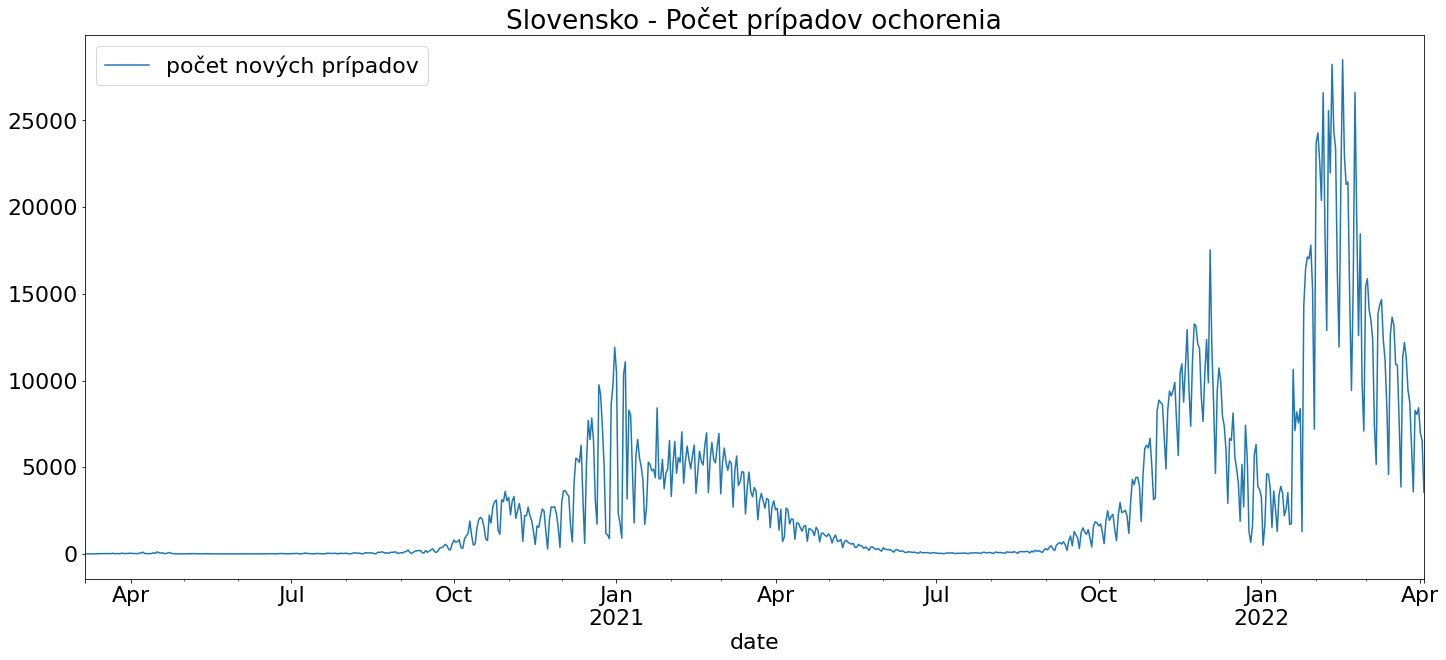

In [11]:
slovakia.plot(y=['new_cases'],
              title="Slovensko - Počet prípadov ochorenia",
              label=["počet nových prípadov"])


## Vrchol prvej vlny

In [12]:
slovakia[(slovakia.index >= '2020-1-1' ) & (slovakia.index <= '2020-05-01')]['new_cases_smoothed'].idxmax()

Timestamp('2020-04-19 00:00:00')

## Vyhladený graf s vyznačenými udalosťami

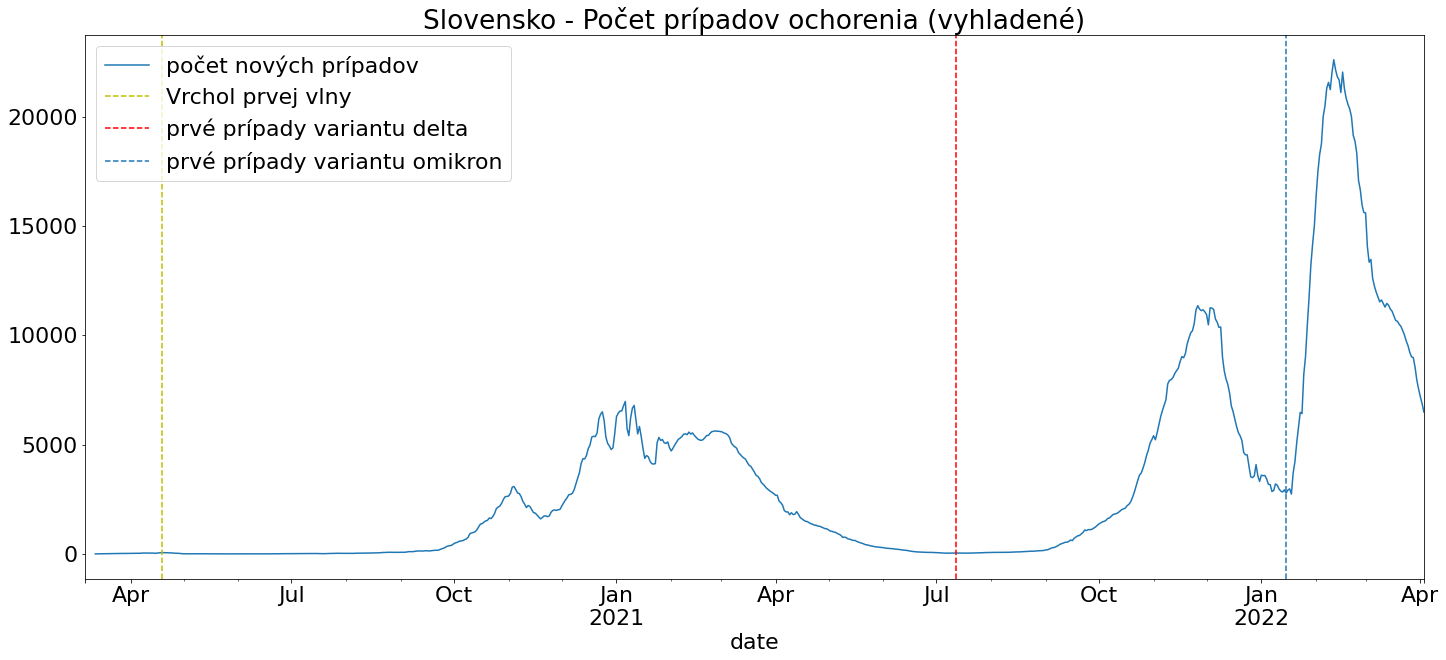

In [13]:
slovakia.plot(y=['new_cases_smoothed'],
              title="Slovensko - Počet prípadov ochorenia (vyhladené)",
              label=["počet nových prípadov"])

plt.axvline(pd.to_datetime('2020-04-19'), color='y', linestyle='--', label='Vrchol prvej vlny')
plt.axvline(pd.to_datetime('2021-07-12'), color='r', linestyle='--', label='prvé prípady variantu delta')
plt.axvline(pd.to_datetime('2022-01-15'), linestyle='--', label='prvé prípady variantu omikron')
plt.legend(loc='upper left')



<AxesSubplot:title={'center':'Slovensko - počet nových prípadov a celkových úmrtí'}, xlabel='date'>

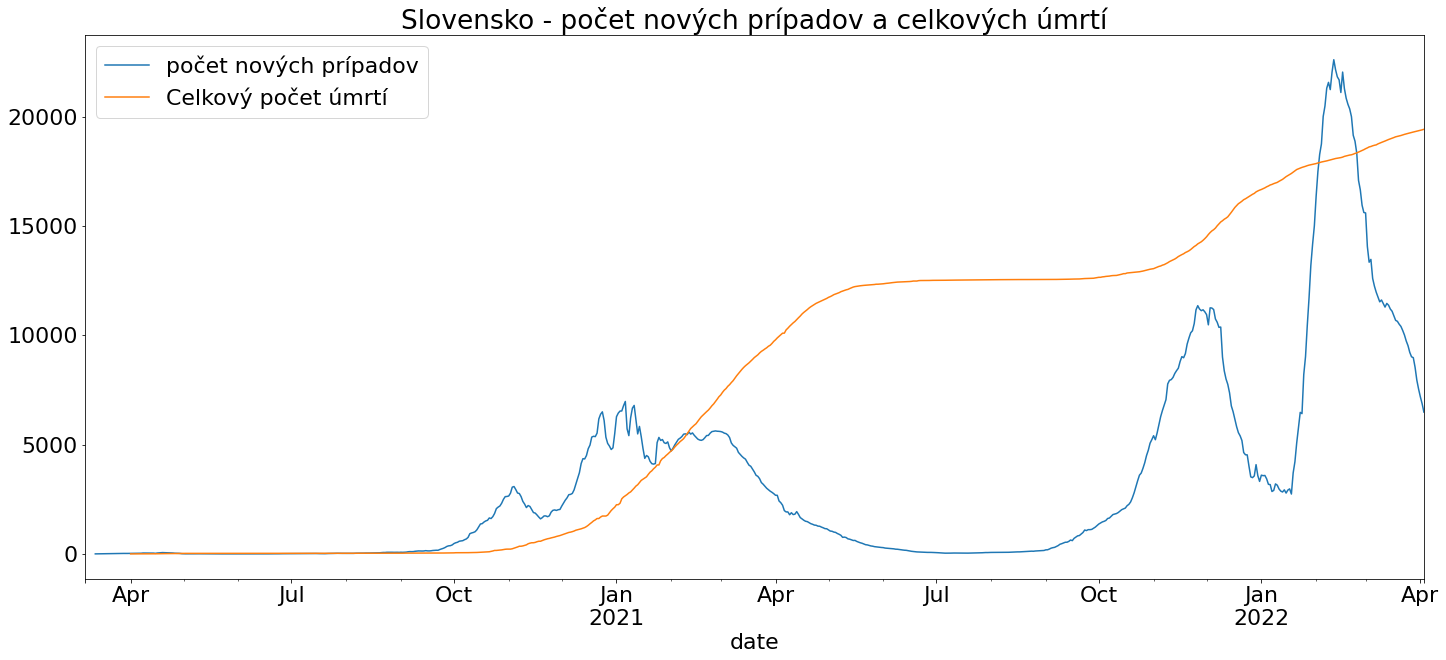

In [14]:
slovakia.plot(y=['new_cases_smoothed', 'total_deaths'],
              title="Slovensko - počet nových prípadov a celkových úmrtí",
              label=["počet nových prípadov", "Celkový počet úmrtí"], subplots=False)


array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>], dtype=object)

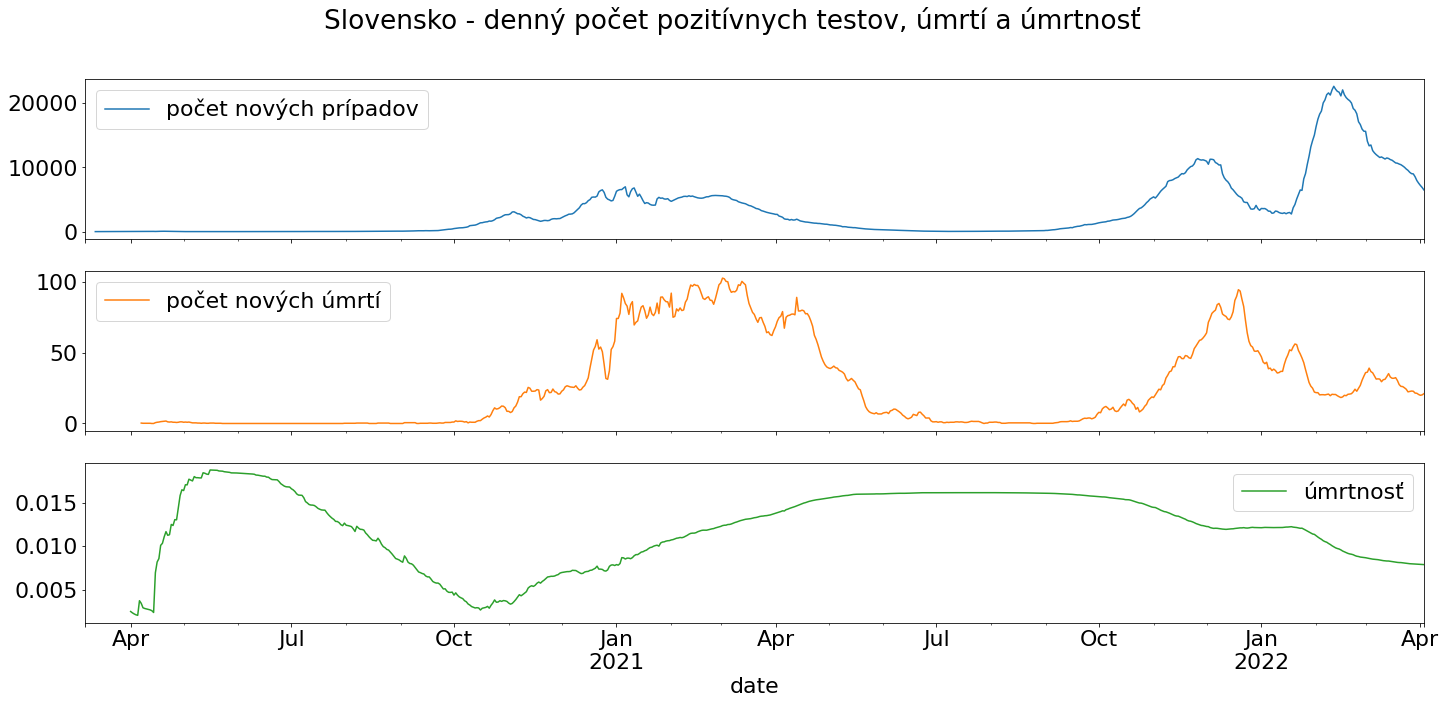

In [15]:
slovakia.plot(y=['new_cases_smoothed', 'new_deaths_smoothed', 'mortality_rate'],
              title="Slovensko - denný počet pozitívnych testov, úmrtí a úmrtnosť",
              label=["počet nových prípadov",
                     "počet nových úmrtí", 'úmrtnosť'],
              subplots=True)



<AxesSubplot:title={'center':'Slovensko - počet prípadov a úmrtí'}, xlabel='date'>

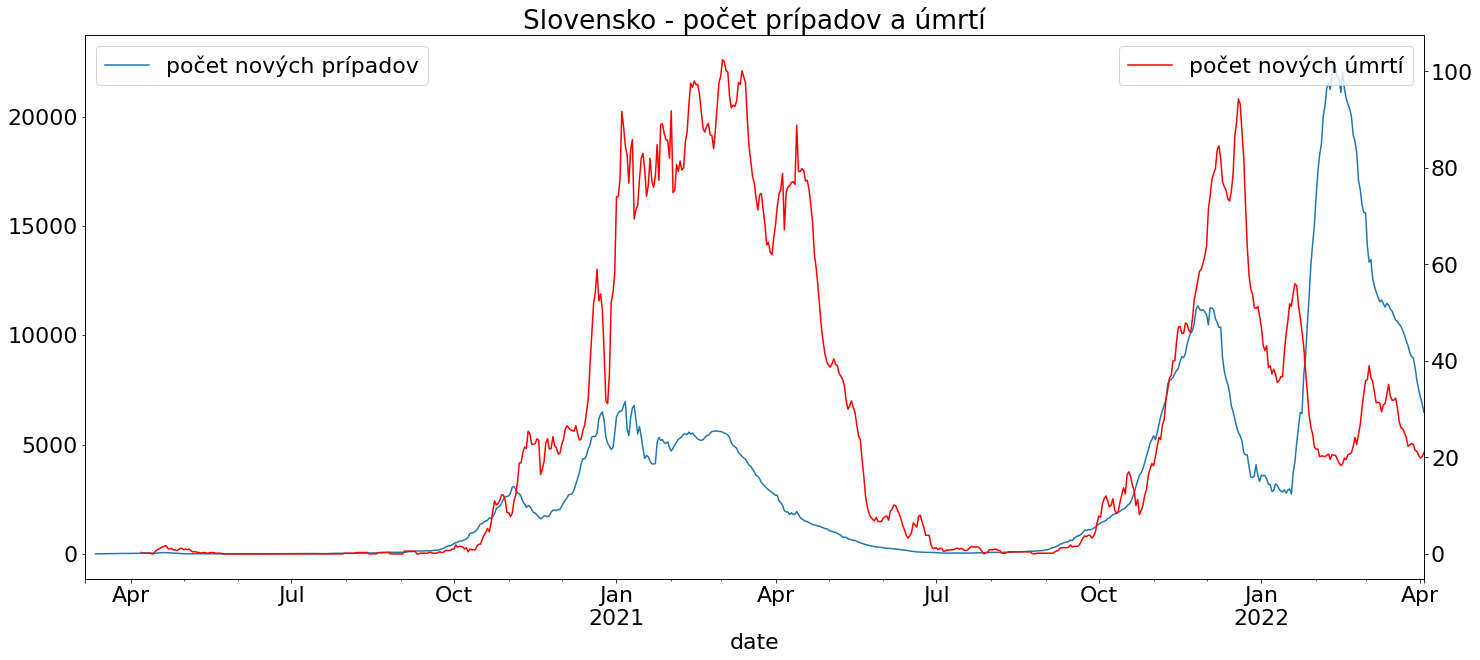

In [16]:
ax1 = slovakia.plot(y=['new_cases_smoothed'], label=["počet nových prípadov"])
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('axes', 1))
slovakia.plot(y=['new_deaths_smoothed'], color="red", ax=ax2,
              title="Slovensko - počet prípadov a úmrtí", label=["počet nových úmrtí"])


## Maximálná úmrtnosť

In [17]:
slovakia['mortality_rate'].max()

0.018753056770152782

### Celková úmrtnosť

In [18]:

slovakia['total_deaths'].max() / slovakia['total_cases'].max()*100

0.7892457392639696

### Kumulatívny počet prípadov a úmrtnosť

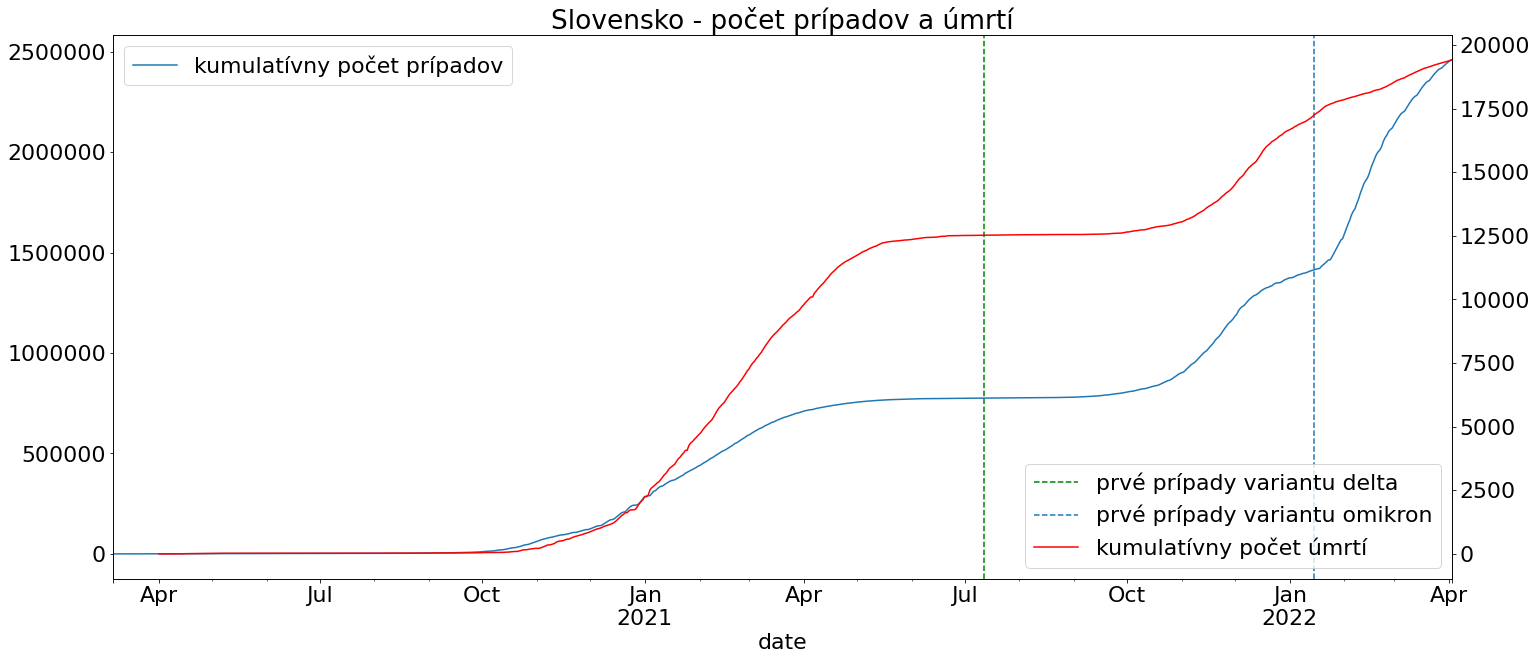

In [19]:
ax1 = slovakia.plot(y=['total_cases'], label=["kumulatívny počet prípadov"])
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('axes', 1))
ax2.axvline(pd.to_datetime('2021-07-12'), color='g', linestyle='--', label='prvé prípady variantu delta')
ax2.axvline(pd.to_datetime('2022-01-15'), linestyle='--', label='prvé prípady variantu omikron')


slovakia.plot(y=['total_deaths'], color="red", ax=ax2,
              title="Slovensko - počet prípadov a úmrtí", 
              label=["kumulatívny počet úmrtí"],
              ).legend(loc='lower right')


# Porovnanie rokov

### Príprava dát

In [20]:
years = ["2020","2021","2022"]

years_df = pd.DataFrame(index=pd.date_range('2020-01-01','2020-12-31', freq='1D').strftime('%m-%d'))
for year in years:
    tmp = slovakia[(slovakia.index >= year +'-01-01' ) & (slovakia.index <= year +'-12-31')][interesting_colums].add_prefix(year + "_")
    tmp.index = tmp.index.strftime('%m-%d')
    years_df = pd.merge(years_df,tmp,left_index= True, right_index= True,how="left")


### Počet prípadov

In [21]:
years_df[[ year + "_new_cases_smoothed" for year in years]].plot_bokeh( 
    figsize=(1200,600),
    number_format="1",
    title="Porovnanie rokov - Počet prípadov na Slovensku"
    )

Figure(id='1003', ...)

### Počet úmrtí

In [22]:
years_df[[ year + "_new_deaths_smoothed" for year in years]].plot_bokeh( 
    figsize=(1200,600),
    number_format="1",
    title="Porovnanie rokov - Počet úmrtí na Slovensku"
    )

Figure(id='1179', ...)

### Kvartálne porovnanie počtu prípadov a obetí

In [23]:
slovakia[['new_cases','new_deaths']].groupby(pd.PeriodIndex(slovakia.index,freq='Q')).sum()

,new_cases,new_deaths
date,,
2020Q1,363.0,0.0
2020Q2,1304.0,28.0
2020Q3,8474.0,20.0
2020Q4,264462.0,2090.0
2021Q1,433273.0,7581.0
2021Q2,67135.0,2791.0
2021Q3,29361.0,127.0
2021Q4,566710.0,3998.0
2022Q1,1072055.0,2717.0


In [27]:
slovakia[['new_cases','new_deaths']].resample('1Y').sum()

,new_cases,new_deaths
date,,
2020-12-31,274603.0,2138.0
2021-12-31,1096479.0,14497.0
2022-12-31,1089115.0,2782.0
